## This is meant to answer the first question in Chapter 2: 
#### How does size structure in Arctic phytoplankton communities changeover the year?  What are the regional differences?

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

In [2]:
print('What is the file you want to comapre with? (new_file)?')
new_file = input('')
print('What year is the new_file? (year)')
new_year = input('')

What is the file you want to comapre with? (new_file)?


 GNG595


What year is the new_file? (year)


 20yrclim


## Phytoplankton

In [3]:
diat1_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_diat1C.*.nc', recursive=True))
diat1_ds = xr.open_mfdataset(diat1_inds,combine='by_coords')

diat2_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_diat2C.*.nc', recursive=True))
diat2_ds = xr.open_mfdataset(diat2_inds,combine='by_coords')

diat3_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_diat3C.*.nc', recursive=True))
diat3_ds = xr.open_mfdataset(diat3_inds,combine='by_coords')

mp1_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_mp1C.*.nc', recursive=True))
mp1_ds = xr.open_mfdataset(mp1_inds,combine='by_coords')

mp2_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_mp2C.*.nc', recursive=True))
mp2_ds = xr.open_mfdataset(mp2_inds,combine='by_coords')

mp3_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_mp3C.*.nc', recursive=True))
mp3_ds = xr.open_mfdataset(mp3_inds,combine='by_coords')

mp4_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_mp4C.*.nc', recursive=True))
mp4_ds = xr.open_mfdataset(mp4_inds,combine='by_coords')

pp_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_ppC.*.nc', recursive=True))
pp_ds = xr.open_mfdataset(pp_inds,combine='by_coords')

diaz_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_diazC.*.nc', recursive=True))
diaz_ds = xr.open_mfdataset(diaz_inds,combine='by_coords')

In [4]:
phytoC = np.stack([pp_ds.ppC, mp1_ds.mp1C, diaz_ds.diazC, 
                               diat1_ds.diat1C, mp2_ds.mp2C, diat2_ds.diat2C, 
                               mp3_ds.mp3C, diat3_ds.diat3C, mp4_ds.mp4C])

phytoC = np.sum(phytoC, axis =2) * 10 #integrate over depth #mmol m-2

In [5]:
# UNITS, we start with mmolC/m^3, but want to integrate with depth, so we multiply by 10m depths, and divide by depth total (150m)!
# end up with mmolC/m^3. 
d1c_clim = diat1_ds.diat1C.sum(dim='z_t_150m') * 10/150 
d2c_clim = diat2_ds.diat2C.sum(dim='z_t_150m') * 10/150
d3c_clim = diat3_ds.diat3C.sum(dim='z_t_150m') * 10/150
mp1c_clim = mp1_ds.mp1C.sum(dim='z_t_150m') * 10/150
mp2c_clim = mp2_ds.mp2C.sum(dim='z_t_150m') * 10/150
mp3c_clim = mp3_ds.mp3C.sum(dim='z_t_150m') * 10/150
mp4c_clim = mp4_ds.mp4C.sum(dim='z_t_150m') * 10/150
diazc_clim = diaz_ds.diazC.sum(dim='z_t_150m') * 10/150
ppc_clim = pp_ds.ppC.sum(dim='z_t_150m') * 10/150


## Zooplankton

In [6]:
zoo1_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/remapgrid_GNG595_zoo1C.*.nc', recursive=True))
zoo1_ds = xr.open_mfdataset(zoo1_inds,combine='by_coords')
zoo2_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/remapgrid_GNG595_zoo2C.*.nc', recursive=True))
zoo2_ds = xr.open_mfdataset(zoo2_inds,combine='by_coords')
zoo3_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/remapgrid_GNG595_zoo3C.*.nc', recursive=True))
zoo3_ds = xr.open_mfdataset(zoo3_inds,combine='by_coords')
zoo4_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/remapgrid_GNG595_zoo4C.*.nc', recursive=True))
zoo4_ds = xr.open_mfdataset(zoo4_inds,combine='by_coords')
zoo5_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/remapgrid_GNG595_zoo5C.*.nc', recursive=True))
zoo5_ds = xr.open_mfdataset(zoo5_inds,combine='by_coords')
zoo6_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/remapgrid_GNG595_zoo6C.*.nc', recursive=True))
zoo6_ds = xr.open_mfdataset(zoo6_inds,combine='by_coords')

In [7]:
zooC = np.stack([zoo1_ds.zoo1C, zoo2_ds.zoo2C, zoo3_ds.zoo3C, 
                               zoo4_ds.zoo4C, zoo5_ds.zoo5C, zoo6_ds.zoo6C])
zooC = np.sum(zooC, axis =2) * 10 #integrate over depth #mmol m-2

In [8]:
# UNITS, we start with mmolC/m^3, but want to integrate with depth, so we multiply by 10m depths, and divide by depth total (150m)!
# end up with mmolC/m^3. 
zoo1c_clim = zoo1_ds.zoo1C.sum(dim='z_t_150m') * 10/150
zoo2c_clim = zoo2_ds.zoo2C.sum(dim='z_t_150m') * 10/150
zoo3c_clim = zoo3_ds.zoo3C.sum(dim='z_t_150m') * 10/150
zoo4c_clim = zoo4_ds.zoo4C.sum(dim='z_t_150m') * 10/150
zoo5c_clim = zoo5_ds.zoo5C.sum(dim='z_t_150m') * 10/150
zoo6c_clim = zoo6_ds.zoo6C.sum(dim='z_t_150m') * 10/150

'**' add all monts into one file '**'

In [9]:
## Chuckchi sea
d1c_cs = d1c_clim[:,150:170,0:25].mean(axis=(1,2))
d2c_cs = d2c_clim[:,150:170,0:25].mean(axis=(1,2))
d3c_cs = d3c_clim[:,150:170,0:25].mean(axis=(1,2))
mp1c_cs = mp1c_clim[:,150:170,0:25].mean(axis=(1,2))
mp2c_cs = mp2c_clim[:,150:170,0:25].mean(axis=(1,2))
mp3c_cs = mp3c_clim[:,150:170,0:25].mean(axis=(1,2))
mp4c_cs = mp4c_clim[:,150:170,0:25].mean(axis=(1,2))
ppc_cs = ppc_clim[:,150:170,0:25].mean(axis=(1,2))
diazc_cs = diazc_clim[:,150:170,0:25].mean(axis=(1,2))

zoo1c_cs = zoo1c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo2c_cs = zoo2c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo3c_cs = zoo3c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo4c_cs = zoo4c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo5c_cs = zoo5c_clim[:,150:170,0:25].mean(axis=(1,2))
zoo6c_cs = zoo6c_clim[:,150:170,0:25].mean(axis=(1,2))

cs_phyto = d1c_cs + d2c_cs + d3c_cs + mp1c_cs + mp2c_cs + mp3c_cs + mp4c_cs + ppc_cs + diazc_cs
cs_zoo = zoo1c_cs + zoo2c_cs + zoo3c_cs + zoo4c_cs + zoo5c_cs + zoo6c_cs


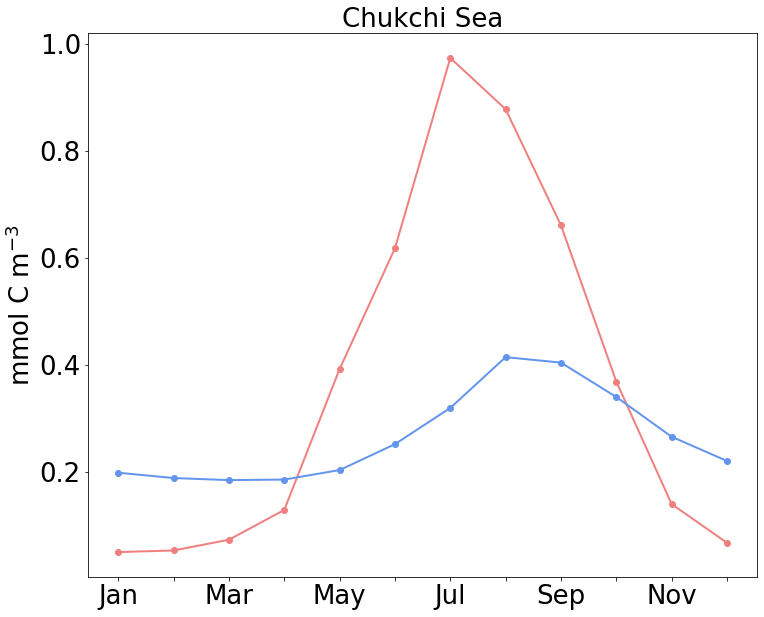

In [51]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Chukchi Sea',fontsize=26)

ax.plot(cs_phyto, '-o', color='lightcoral', linewidth=2,label='Phytoplankton')
ax.plot(cs_zoo, '-o',color='cornflowerblue', linewidth=2, label='Zooplankton')
#L = ax.legend(loc='upper left', fontsize=20)
#plt.setp(L.texts, family='serif')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)

fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Chuckchi_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [11]:
np.nansum(cs_phyto)

4.397103

In [12]:
## Beaufort Sea  
d1c_bs = d1c_clim[:,150:170,25:55].mean(axis=(1,2))
d2c_bs = d2c_clim[:,150:170,25:55].mean(axis=(1,2))
d3c_bs = d3c_clim[:,150:170,25:55].mean(axis=(1,2))
mp1c_bs = mp1c_clim[:,150:170,25:55].mean(axis=(1,2))
mp2c_bs = mp2c_clim[:,150:170,25:55].mean(axis=(1,2))
mp3c_bs = mp3c_clim[:,150:170,25:55].mean(axis=(1,2))
mp4c_bs = mp4c_clim[:,150:170,25:55].mean(axis=(1,2))
ppc_bs = ppc_clim[:,150:170,25:55].mean(axis=(1,2))
diazc_bs = diazc_clim[:,150:170,25:55].mean(axis=(1,2))
zoo1c_bs = zoo1c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo2c_bs = zoo2c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo3c_bs = zoo3c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo4c_bs = zoo4c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo5c_bs = zoo5c_clim[:,150:170,25:55].mean(axis=(1,2))
zoo6c_bs = zoo6c_clim[:,150:170,25:55].mean(axis=(1,2))

bs_phyto = d1c_bs + d2c_bs + d3c_bs + mp1c_bs + mp2c_bs + mp3c_bs + mp4c_bs + ppc_bs + diazc_bs
bs_zoo = zoo1c_bs + zoo2c_bs + zoo3c_bs + zoo4c_bs + zoo5c_bs + zoo6c_bs

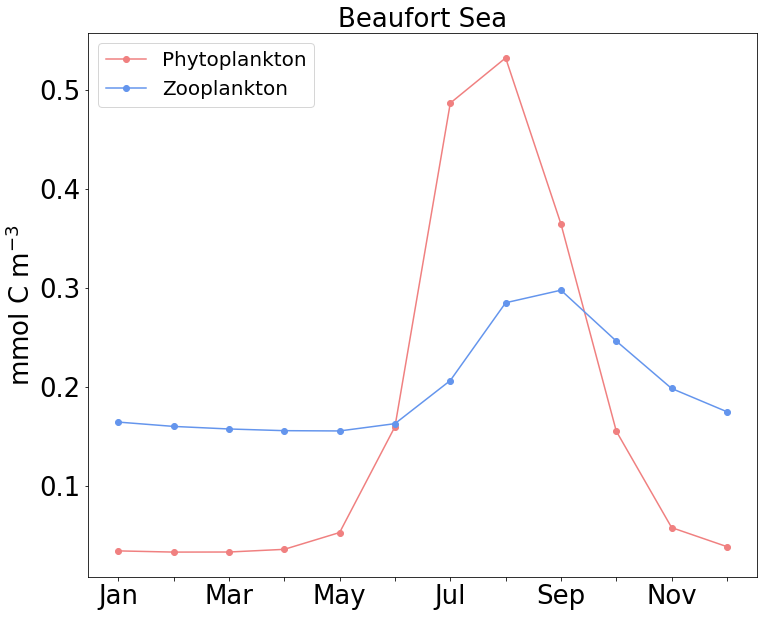

In [13]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Beaufort Sea',fontsize=26)

ax.plot(bs_phyto, '-o', color='lightcoral', label='Phytoplankton')
ax.plot(bs_zoo, '-o',color='cornflowerblue', label='Zooplankton')
L = ax.legend(loc='upper left', fontsize=20)

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Beaufort_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [14]:
# Central Arctic
d1c_ao = d1c_clim[:,170:180,:].mean(axis=(1,2))
d2c_ao = d2c_clim[:,170:180,:].mean(axis=(1,2))
d3c_ao = d3c_clim[:,170:180,:].mean(axis=(1,2))
mp1c_ao = mp1c_clim[:,170:180,:].mean(axis=(1,2))
mp2c_ao = mp2c_clim[:,170:180,:].mean(axis=(1,2))
mp3c_ao = mp3c_clim[:,170:180,:].mean(axis=(1,2))
mp4c_ao = mp4c_clim[:,170:180,:].mean(axis=(1,2))
ppc_ao = ppc_clim[:,170:180,:].mean(axis=(1,2))
diazc_ao = diazc_clim[:,170:180,:].mean(axis=(1,2))
zoo1c_ao = zoo1c_clim[:,170:180,:].mean(axis=(1,2))
zoo2c_ao = zoo2c_clim[:,170:180,:].mean(axis=(1,2))
zoo3c_ao = zoo3c_clim[:,170:180,:].mean(axis=(1,2))
zoo4c_ao = zoo4c_clim[:,170:180,:].mean(axis=(1,2))
zoo5c_ao = zoo5c_clim[:,170:180,:].mean(axis=(1,2))
zoo6c_ao = zoo6c_clim[:,170:180,:].mean(axis=(1,2))

ao_phyto = d1c_ao + d2c_ao + d3c_ao + mp1c_ao + mp2c_ao + mp3c_ao + mp4c_ao + ppc_ao + diazc_ao
ao_zoo = zoo1c_ao + zoo2c_ao + zoo3c_ao + zoo4c_ao + zoo5c_ao + zoo6c_ao

In [15]:
np.nansum(ao_phyto)

3.71433

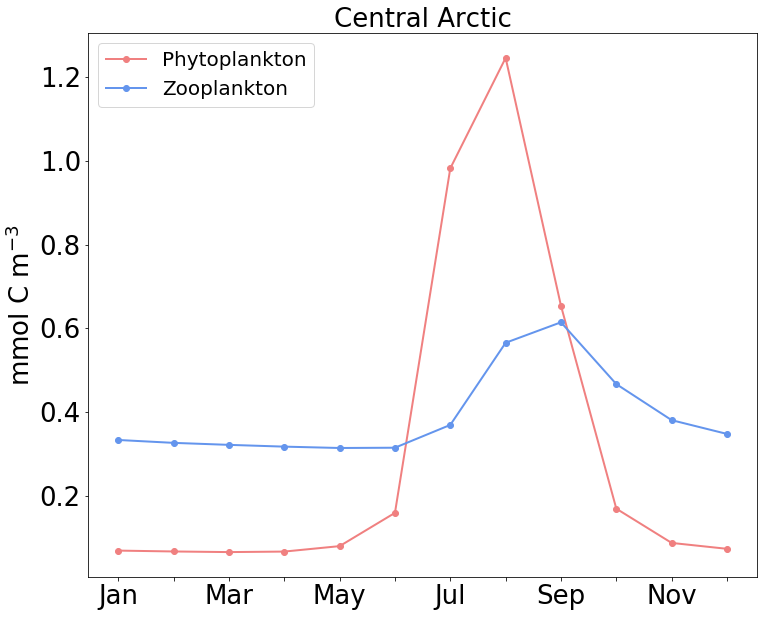

In [16]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Central Arctic',fontsize=26)

ax.plot(ao_phyto, '-o', color='lightcoral', linewidth=2,label='Phytoplankton')
ax.plot(ao_zoo, '-o',color='cornflowerblue', linewidth=2, label='Zooplankton')
L = ax.legend(loc='upper left', fontsize=20)

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/central_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [17]:
## Canadian Archipielago 
d1c_ca = d1c_clim[:,150:170,55:110].mean(axis=(1,2))
d2c_ca = d2c_clim[:,150:170,55:110].mean(axis=(1,2))
d3c_ca = d3c_clim[:,150:170,55:110].mean(axis=(1,2))
mp1c_ca = mp1c_clim[:,150:170,55:110].mean(axis=(1,2))
mp2c_ca = mp2c_clim[:,150:170,55:110].mean(axis=(1,2))
mp3c_ca = mp3c_clim[:,150:170,55:110].mean(axis=(1,2))
mp4c_ca = mp4c_clim[:,150:170,55:110].mean(axis=(1,2))
ppc_ca = ppc_clim[:,150:170,55:110].mean(axis=(1,2))
diazc_ca = diazc_clim[:,150:170,55:110].mean(axis=(1,2))
zoo1c_ca = zoo1c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo2c_ca = zoo2c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo3c_ca = zoo3c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo4c_ca = zoo4c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo5c_ca = zoo5c_clim[:,150:170,55:110].mean(axis=(1,2))
zoo6c_ca = zoo6c_clim[:,150:170,55:110].mean(axis=(1,2))

ca_phyto = d1c_ca + d2c_ca + d3c_ca + mp1c_ca + mp2c_ca + mp3c_ca + mp4c_ca + ppc_ca + diazc_ca
ca_zoo = zoo1c_ca + zoo2c_ca + zoo3c_ca + zoo4c_ca + zoo5c_ca + zoo6c_ca

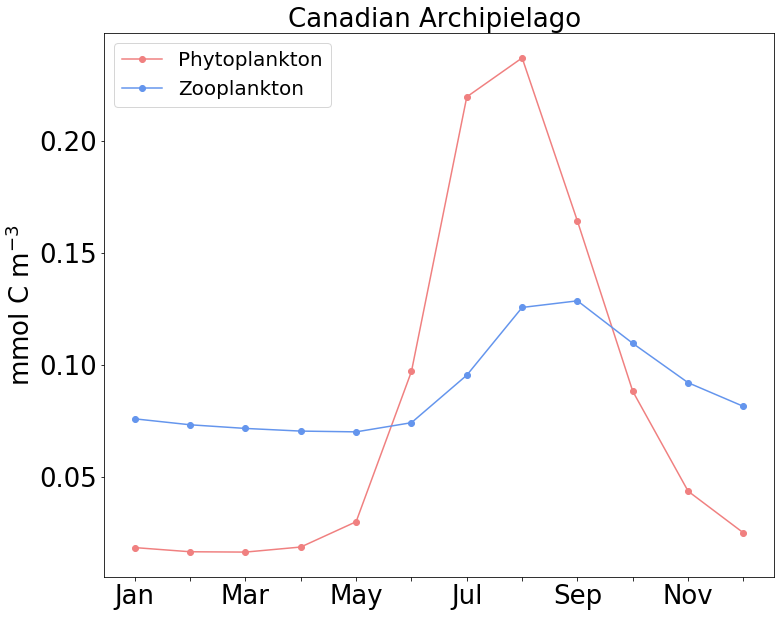

In [18]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Canadian Archipielago ',fontsize=26)

ax.plot(ca_phyto, '-o', color='lightcoral', label='Phytoplankton')
ax.plot(ca_zoo, '-o',color='cornflowerblue', label='Zooplankton')
L = ax.legend(loc='upper left', fontsize=20)


#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Canadian_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [19]:
## Baffin Sea
d1c_bb = d1c_clim[:,150:170,110:135].mean(axis=(1,2))
d2c_bb = d2c_clim[:,150:170,110:135].mean(axis=(1,2))
d3c_bb = d3c_clim[:,150:170,110:135].mean(axis=(1,2))
mp1c_bb = mp1c_clim[:,150:170,110:135].mean(axis=(1,2))
mp2c_bb = mp2c_clim[:,150:170,110:135].mean(axis=(1,2))
mp3c_bb = mp3c_clim[:,150:170,110:135].mean(axis=(1,2))
mp4c_bb = mp4c_clim[:,150:170,110:135].mean(axis=(1,2))
ppc_bb = ppc_clim[:,150:170,110:135].mean(axis=(1,2))
diazc_bb = diazc_clim[:,150:170,110:135].mean(axis=(1,2))
zoo1c_bb = zoo1c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo2c_bb = zoo2c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo3c_bb = zoo3c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo4c_bb = zoo4c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo5c_bb = zoo5c_clim[:,150:170,110:135].mean(axis=(1,2))
zoo6c_bb = zoo6c_clim[:,150:170,110:135].mean(axis=(1,2))

bb_phyto = d1c_bb + d2c_bb + d3c_bb + mp1c_bb + mp2c_bb + mp3c_bb + mp4c_bb + ppc_bb + diazc_bb
bb_zoo = zoo1c_bb + zoo2c_bb + zoo3c_bb + zoo4c_bb + zoo5c_bb + zoo6c_bb

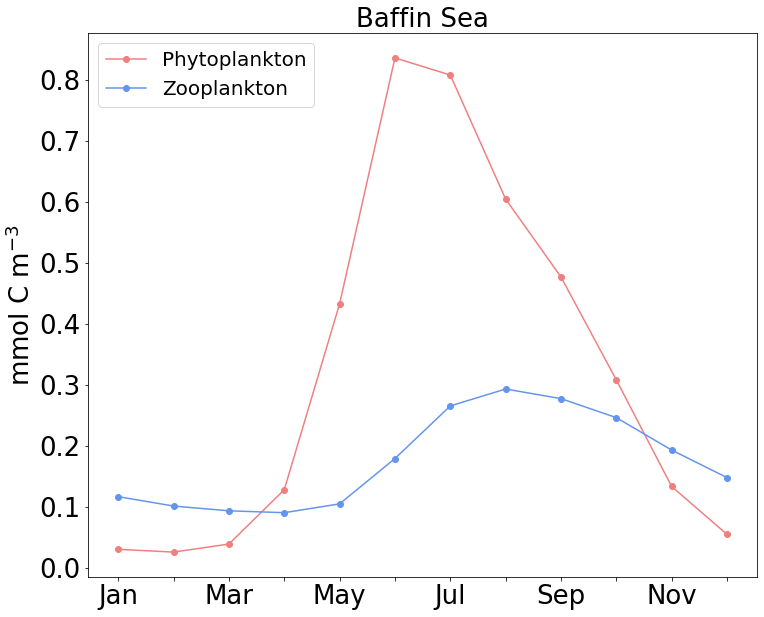

In [20]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Baffin Sea',fontsize=26)

ax.plot(bb_phyto, '-o', color='lightcoral', label='Phytoplankton')
ax.plot(bb_zoo, '-o',color='cornflowerblue', label='Zooplankton')
L = ax.legend(loc='upper left', fontsize=20)

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Baffin_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [21]:
## Eastern Siberian Sea
d1c_ess = d1c_clim[:,150:170,325:360].mean(axis=(1,2))
d2c_ess = d2c_clim[:,150:170,325:360].mean(axis=(1,2))
d3c_ess = d3c_clim[:,150:170,325:360].mean(axis=(1,2))
mp1c_ess = mp1c_clim[:,150:170,325:360].mean(axis=(1,2))
mp2c_ess = mp2c_clim[:,150:170,325:360].mean(axis=(1,2))
mp3c_ess = mp3c_clim[:,150:170,325:360].mean(axis=(1,2))
mp4c_ess = mp4c_clim[:,150:170,325:360].mean(axis=(1,2))
ppc_ess = ppc_clim[:,150:170,325:360].mean(axis=(1,2))
diazc_ess = diazc_clim[:,150:170,325:360].mean(axis=(1,2))
zoo1c_ess = zoo1c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo2c_ess = zoo2c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo3c_ess = zoo3c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo4c_ess = zoo4c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo5c_ess = zoo5c_clim[:,150:170,325:360].mean(axis=(1,2))
zoo6c_ess = zoo6c_clim[:,150:170,325:360].mean(axis=(1,2))

ess_phyto = d1c_ess + d2c_ess + d3c_ess + mp1c_ess + mp2c_ess + mp3c_ess + mp4c_ess + ppc_ess + diazc_ess
ess_zoo = zoo1c_ess + zoo2c_ess + zoo3c_ess + zoo4c_ess + zoo5c_ess + zoo6c_ess

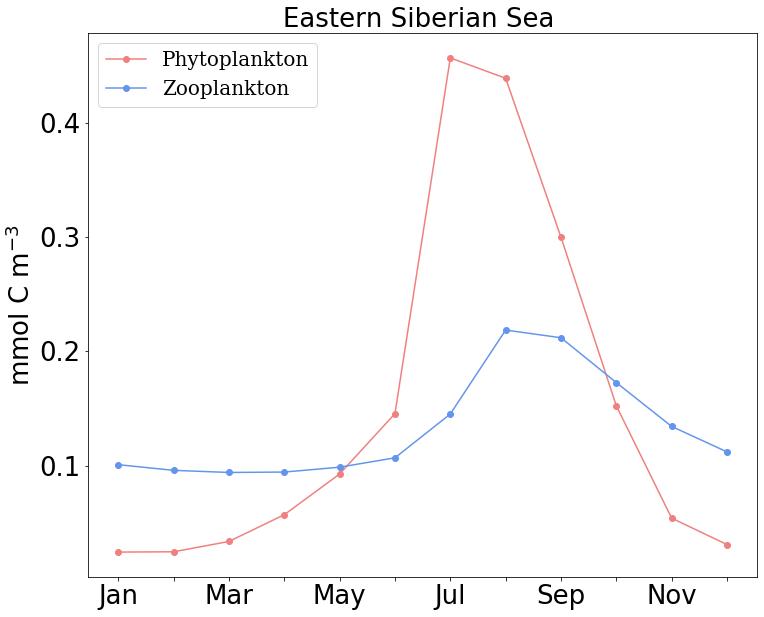

In [22]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Eastern Siberian Sea ',fontsize=26)

ax.plot(ess_phyto, '-o', color='lightcoral', label='Phytoplankton')
ax.plot(ess_zoo, '-o',color='cornflowerblue', label='Zooplankton')
L = ax.legend(loc='upper left', fontsize=20)
plt.setp(L.texts, family='serif')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/ESiberian_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [23]:
## Laptev Sea
d1c_ls = d1c_clim[:,150:170,270:325].mean(axis=(1,2))
d2c_ls = d2c_clim[:,150:170,270:325].mean(axis=(1,2))
d3c_ls = d3c_clim[:,150:170,270:325].mean(axis=(1,2))
mp1c_ls = mp1c_clim[:,150:170,270:325].mean(axis=(1,2))
mp2c_ls = mp2c_clim[:,150:170,270:325].mean(axis=(1,2))
mp3c_ls = mp3c_clim[:,150:170,270:325].mean(axis=(1,2))
mp4c_ls = mp4c_clim[:,150:170,270:325].mean(axis=(1,2))
ppc_ls = ppc_clim[:,150:170,270:325].mean(axis=(1,2))
diazc_ls = diazc_clim[:,150:170,270:325].mean(axis=(1,2))
zoo1c_ls = zoo1c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo2c_ls = zoo2c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo3c_ls = zoo3c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo4c_ls = zoo4c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo5c_ls = zoo5c_clim[:,150:170,270:325].mean(axis=(1,2))
zoo6c_ls = zoo6c_clim[:,150:170,270:325].mean(axis=(1,2))

ls_phyto = d1c_ls + d2c_ls + d3c_ls + mp1c_ls + mp2c_ls + mp3c_ls + mp4c_ls + ppc_ls + diazc_ls
ls_zoo = zoo1c_ls + zoo2c_ls + zoo3c_ls + zoo4c_ls + zoo5c_ls + zoo6c_ls

In [24]:
np.nansum(ls_phyto)

0.76772916

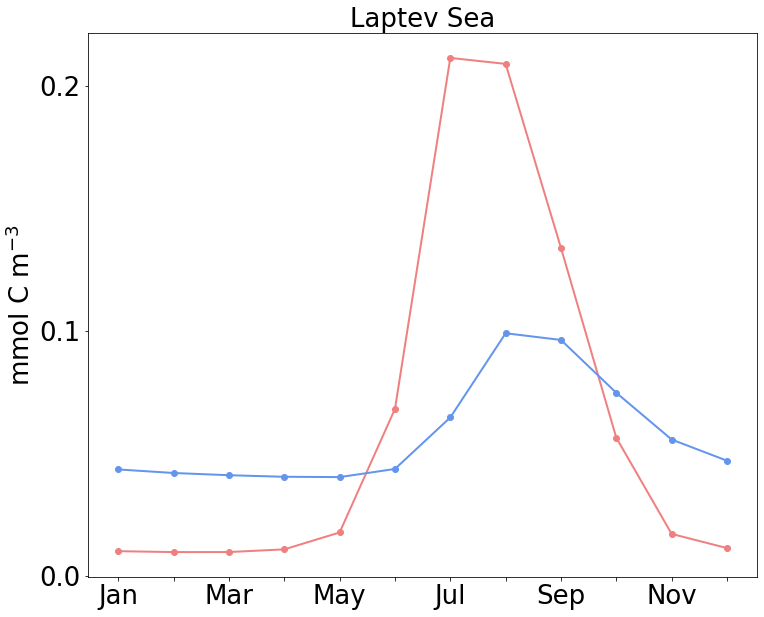

In [55]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Laptev Sea',fontsize=26)

ax.plot(ls_phyto, '-o', color='lightcoral', linewidth=2,label='Phytoplankton')
ax.plot(ls_zoo, '-o',color='cornflowerblue', linewidth=2, label='Zooplankton')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks([0,0.1,0.2],fontsize=26)
#plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
 
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Lapteb_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [26]:
## Kara Sea
d1c_ks = d1c_clim[:,150:170,233:270].mean(axis=(1,2))
d2c_ks = d2c_clim[:,150:170,233:270].mean(axis=(1,2))
d3c_ks = d3c_clim[:,150:170,233:270].mean(axis=(1,2))
mp1c_ks = mp1c_clim[:,150:170,233:270].mean(axis=(1,2))
mp2c_ks = mp2c_clim[:,150:170,233:270].mean(axis=(1,2))
mp3c_ks = mp3c_clim[:,150:170,233:270].mean(axis=(1,2))
mp4c_ks = mp4c_clim[:,150:170,233:270].mean(axis=(1,2))
ppc_ks = ppc_clim[:,150:170,233:270].mean(axis=(1,2))
diazc_ks = diazc_clim[:,150:170,233:270].mean(axis=(1,2))
zoo1c_ks = zoo1c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo2c_ks = zoo2c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo3c_ks = zoo3c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo4c_ks = zoo4c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo5c_ks = zoo5c_clim[:,150:170,233:270].mean(axis=(1,2))
zoo6c_ks = zoo6c_clim[:,150:170,233:270].mean(axis=(1,2))

ks_phyto = d1c_ks + d2c_ks + d3c_ks + mp1c_ks + mp2c_ks + mp3c_ks + mp4c_ks + ppc_ks + diazc_ks
ks_zoo = zoo1c_ks + zoo2c_ks + zoo3c_ks + zoo4c_ks + zoo5c_ks + zoo6c_ks

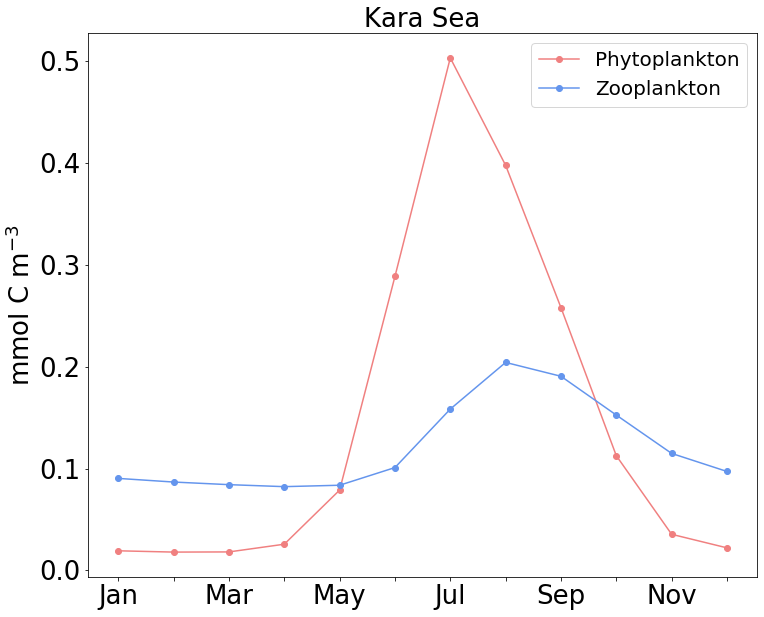

In [27]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Kara Sea',fontsize=26)

ax.plot(ks_phyto, '-o', color='lightcoral', label='Phytoplankton')
ax.plot(ks_zoo, '-o',color='cornflowerblue', label='Zooplankton')
L = ax.legend(loc='upper right', fontsize=20)


#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Kara_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [28]:
## Barents Sea
d1c_bts = d1c_clim[:,150:170,200:233].mean(axis=(1,2))
d2c_bts = d2c_clim[:,150:170,200:233].mean(axis=(1,2))
d3c_bts = d3c_clim[:,150:170,200:233].mean(axis=(1,2))
mp1c_bts = mp1c_clim[:,150:170,200:233].mean(axis=(1,2))
mp2c_bts = mp2c_clim[:,150:170,200:233].mean(axis=(1,2))
mp3c_bts = mp3c_clim[:,150:170,200:233].mean(axis=(1,2))
mp4c_bts = mp4c_clim[:,150:170,200:233].mean(axis=(1,2))
ppc_bts = ppc_clim[:,150:170,200:233].mean(axis=(1,2))
diazc_bts = diazc_clim[:,150:170,200:233].mean(axis=(1,2))
zoo1c_bts = zoo1c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo2c_bts = zoo2c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo3c_bts = zoo3c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo4c_bts = zoo4c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo5c_bts = zoo5c_clim[:,150:170,200:233].mean(axis=(1,2))
zoo6c_bts = zoo6c_clim[:,150:170,200:233].mean(axis=(1,2))

bts_phyto = d1c_bts + d2c_bts + d3c_bts + mp1c_bts + mp2c_bts + mp3c_bts + mp4c_bts + ppc_bts + diazc_bts
bts_zoo = zoo1c_bts + zoo2c_bts + zoo3c_bts + zoo4c_bts + zoo5c_bts + zoo6c_bts

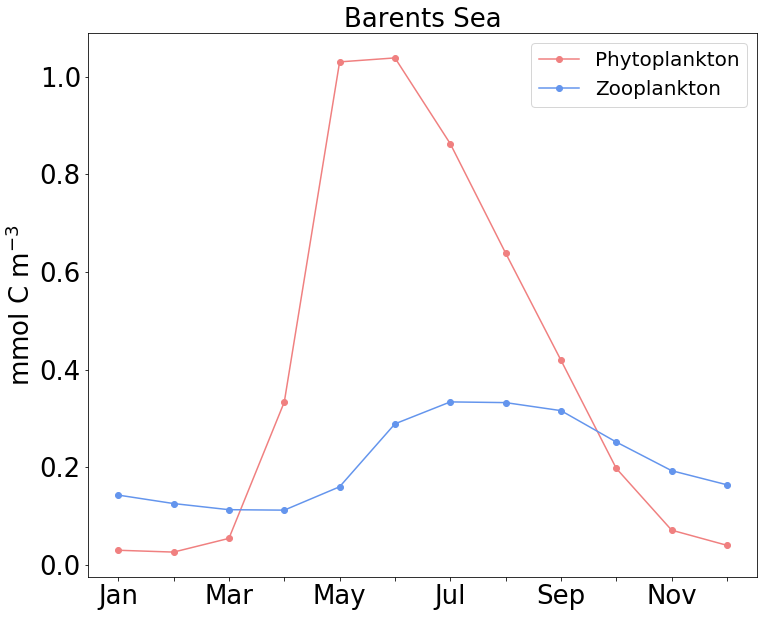

In [29]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Barents Sea',fontsize=26)

ax.plot(bts_phyto, '-o', color='lightcoral', label='Phytoplankton')
ax.plot(bts_zoo, '-o',color='cornflowerblue', label='Zooplankton')
L = ax.legend(loc='upper right', fontsize=20)


#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Barents_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

In [30]:
## Nordic Sea  
d1c_ns = d1c_clim[:,150:170,135:200].mean(axis=(1,2))
d2c_ns = d2c_clim[:,150:170,135:200].mean(axis=(1,2))
d3c_ns = d3c_clim[:,150:170,135:200].mean(axis=(1,2))
mp1c_ns = mp1c_clim[:,150:170,135:200].mean(axis=(1,2))
mp2c_ns = mp2c_clim[:,150:170,135:200].mean(axis=(1,2))
mp3c_ns = mp3c_clim[:,150:170,135:200].mean(axis=(1,2))
mp4c_ns = mp4c_clim[:,150:170,135:200].mean(axis=(1,2))
ppc_ns = ppc_clim[:,150:170,135:200].mean(axis=(1,2))
diazc_ns = diazc_clim[:,150:170,135:200].mean(axis=(1,2))
zoo1c_ns = zoo1c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo2c_ns = zoo2c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo3c_ns = zoo3c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo4c_ns = zoo4c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo5c_ns = zoo5c_clim[:,150:170,135:200].mean(axis=(1,2))
zoo6c_ns = zoo6c_clim[:,150:170,135:200].mean(axis=(1,2))

ns_phyto = d1c_ns + d2c_ns + d3c_ns + mp1c_ns + mp2c_ns + mp3c_ns + mp4c_ns + ppc_ns + diazc_ns
ns_zoo = zoo1c_ns + zoo2c_ns + zoo3c_ns + zoo4c_ns + zoo5c_ns + zoo6c_ns

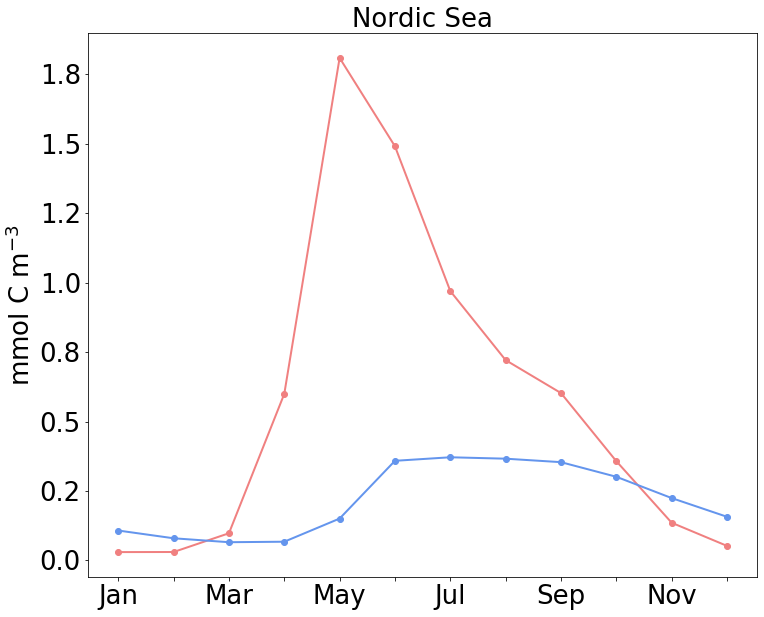

In [53]:
# plot all fo these figures together 
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Nordic Sea',fontsize=26)

ax.plot(ns_phyto, '-o', color='lightcoral', linewidth=2,label='Phytoplankton')
ax.plot(ns_zoo, '-o',color='cornflowerblue', linewidth=2, label='Zooplankton')

#plt.xticks(np.arange(0, 13, 1))
plt.xticks(np.arange(12), ('Jan', '', 'Mar', '', 'May',
                             '','Jul','','Sep','','Nov',''), fontsize=26)
plt.yticks(fontsize=26)
plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
 
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/NorthSea_clim_zoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

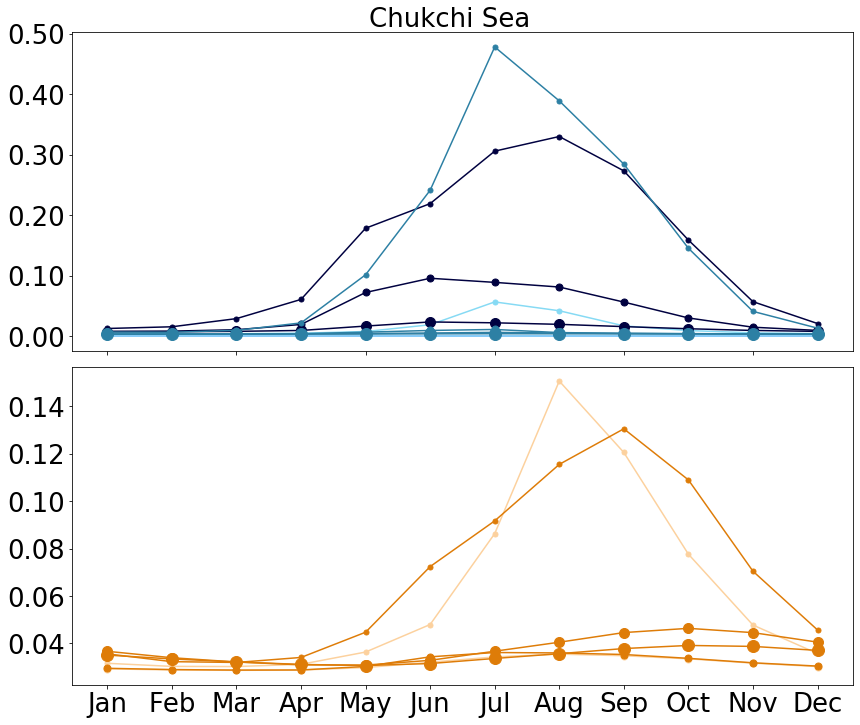

In [57]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Chukchi Sea',y=0.91,fontsize=26)

axs[0].plot(ppc_cs, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_cs, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_cs, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_cs, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_cs, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_cs, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_cs, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_cs, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_cs, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
#axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=26)
axs[0].tick_params(axis='y', labelsize= 26)

axs[1].plot(zoo1c_cs, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_cs, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_cs, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_cs, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_cs, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_cs, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=26)

#plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
plt.yticks(fontsize=26)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
from matplotlib.ticker import FormatStrFormatter
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Chuckchi_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

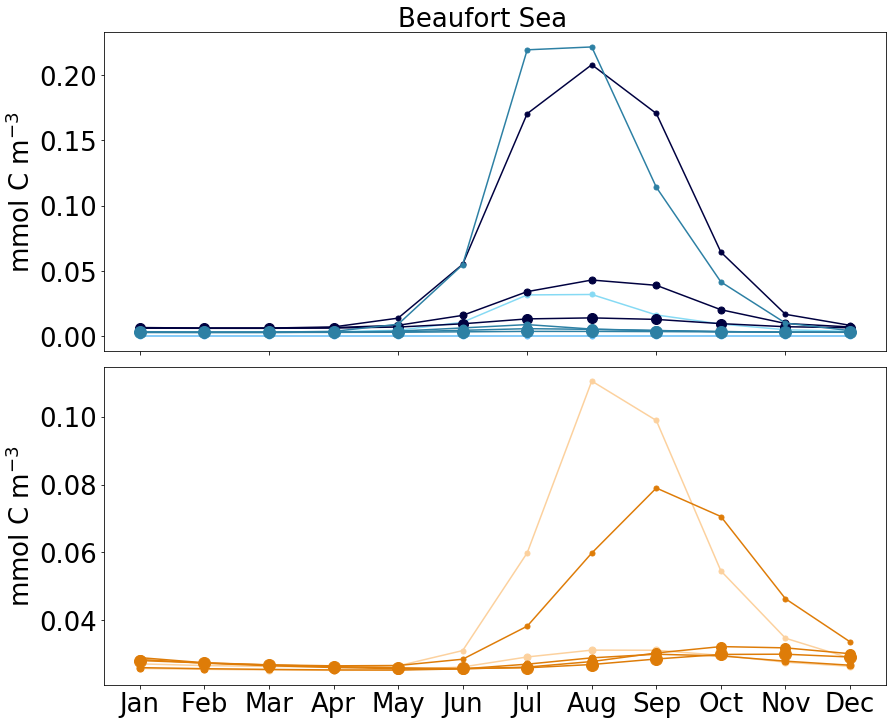

In [44]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Beaufort Sea',y=0.91,fontsize=26)


axs[0].plot(ppc_bs, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_bs, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_bs, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_bs, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_bs, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_bs, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_bs, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_bs, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_bs, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=26)
axs[0].tick_params(axis='y', labelsize= 26)

axs[1].plot(zoo1c_bs, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_bs, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_bs, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_bs, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_bs, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_bs, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=26)

plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
plt.yticks(fontsize=26)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Beaufort_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

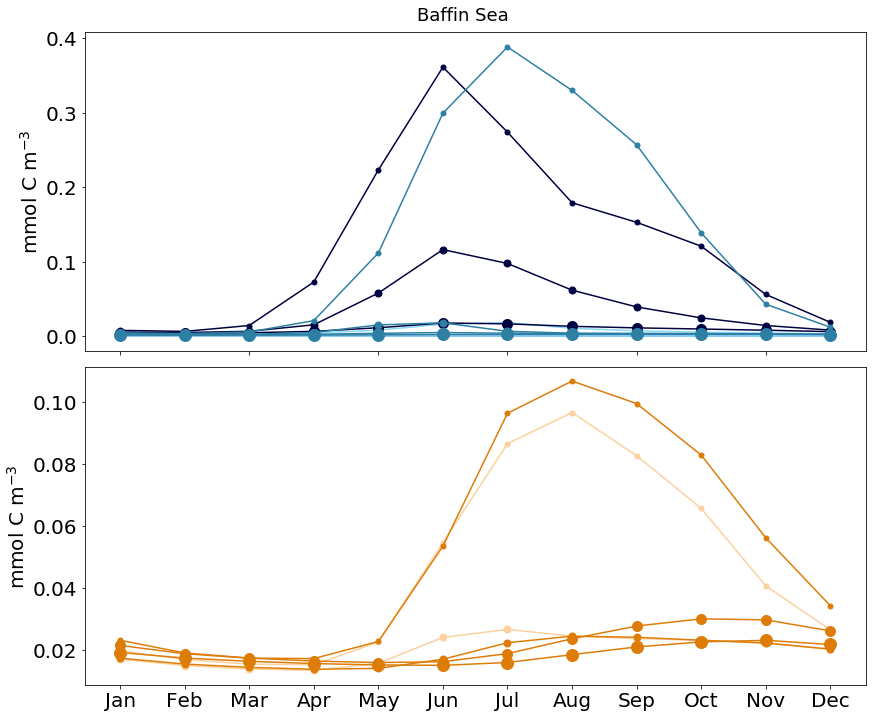

In [34]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Baffin Sea',y=0.91,fontsize=18)

axs[0].plot(ppc_bb, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_bb, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_bb, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_bb, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_bb, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_bb, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_bb, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_bb, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_bb, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=20)
axs[0].tick_params(axis='y', labelsize= 20)

axs[1].plot(zoo1c_bb, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_bb, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_bb, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_bb, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_bb, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_bb, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=20)

plt.ylabel('$mmol$ C $m^{-3}$', fontsize=20)
plt.yticks(fontsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Baffin_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

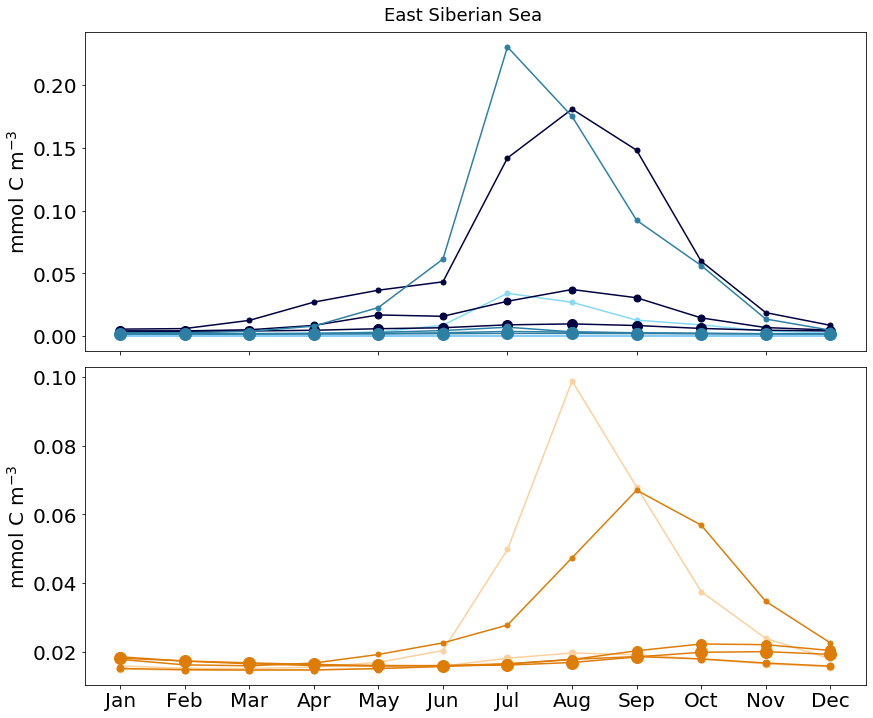

In [35]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('East Siberian Sea',y=0.91,fontsize=18)

axs[0].plot(ppc_ess, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_ess, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_ess, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_ess, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_ess, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_ess, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_ess, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_ess, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_ess, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=20)
axs[0].tick_params(axis='y', labelsize= 20)

axs[1].plot(zoo1c_ess, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_ess, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_ess, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_ess, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_ess, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_ess, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=20)

plt.ylabel('$mmol$ C $m^{-3}$', fontsize=20)
plt.yticks(fontsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/ESiberian_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

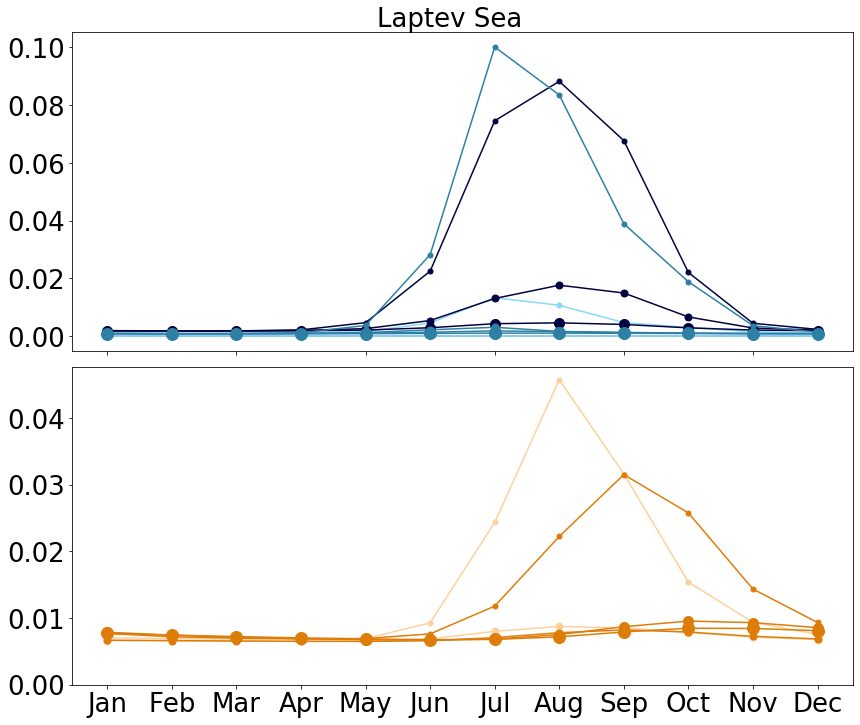

In [60]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Laptev Sea',y=0.91,fontsize=26)

axs[0].plot(ppc_ls, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_ls, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_ls, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_ls, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_ls, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_ls, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_ls, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_ls, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_ls, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
#axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=26)
axs[0].tick_params(axis='y', labelsize= 26)

axs[1].plot(zoo1c_ls, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_ls, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_ls, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_ls, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_ls, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_ls, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=26)

#plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
plt.yticks([0.00,0.01,0.02,0.03,0.04],fontsize=26)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))     
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Laptev_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

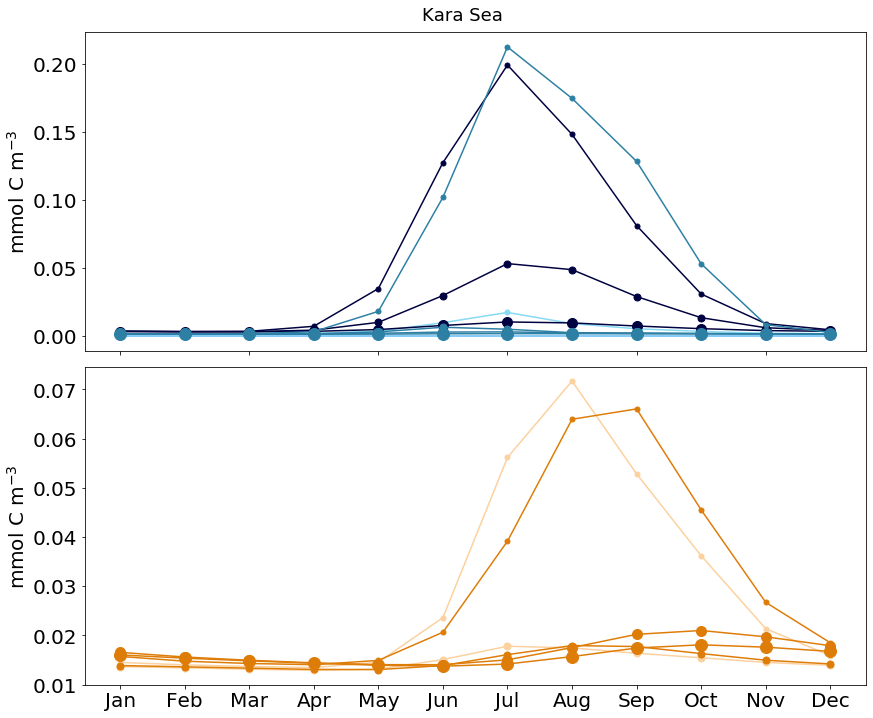

In [37]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Kara Sea',y=0.91,fontsize=18)

axs[0].plot(ppc_ks, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_ks, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_ks, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_ks, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_ks, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_ks, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_ks, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_ks, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_ks, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=20)
axs[0].tick_params(axis='y', labelsize= 20)

axs[1].plot(zoo1c_ks, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_ks, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_ks, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_ks, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_ks, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_ks, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=20)

plt.ylabel('$mmol$ C $m^{-3}$', fontsize=20)
plt.yticks(fontsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Kara_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

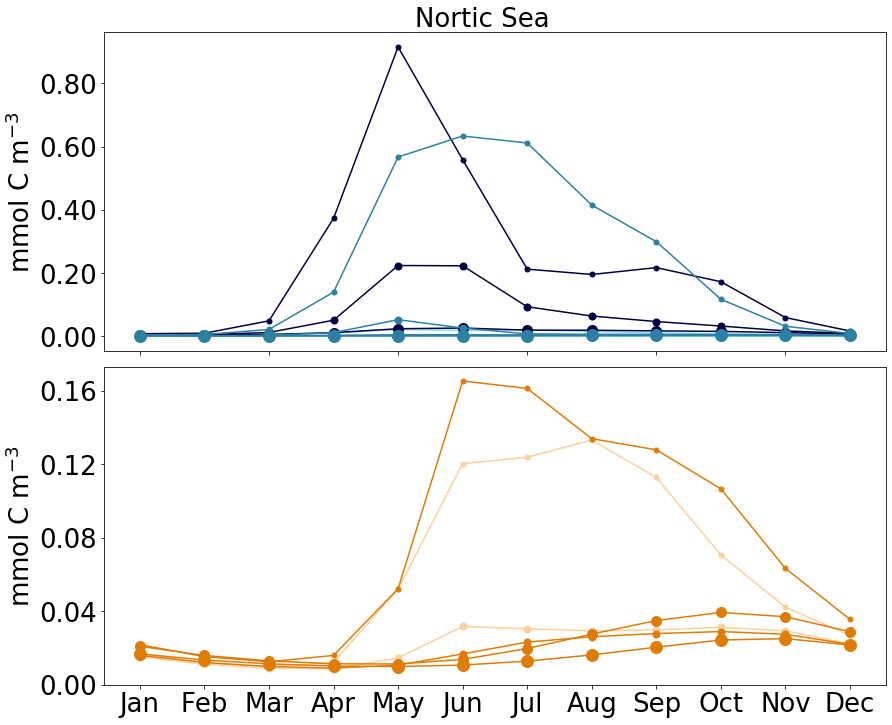

In [61]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Nortic Sea',y=0.91,fontsize=26)

axs[0].plot(ppc_ns, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_ns, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_ns, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_ns, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_ns, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_ns, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_ns, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_ns, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_ns, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=26)
axs[0].tick_params(axis='y', labelsize= 26)

axs[1].plot(zoo1c_ns, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_ns, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_ns, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_ns, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_ns, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_ns, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=26)

plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
plt.yticks([0.00,0.04,0.08,0.12,0.16],fontsize=26)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Nortic_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

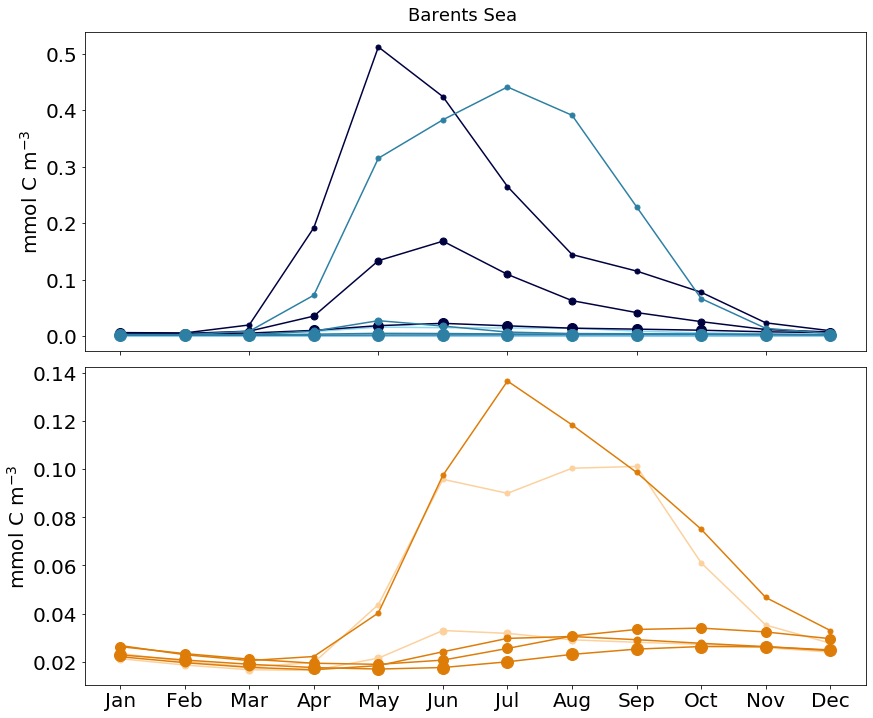

In [39]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Barents Sea',y=0.91,fontsize=18)

axs[0].plot(ppc_bts, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_bts, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_bts, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_bts, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_bts, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_bts, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_bts, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_bts, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_bts, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=20)
axs[0].tick_params(axis='y', labelsize= 20)

axs[1].plot(zoo1c_bts, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_bts, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_bts, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_bts, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_bts, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_bts, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=20)

plt.ylabel('$mmol$ C $m^{-3}$', fontsize=20)
plt.yticks(fontsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Barents_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

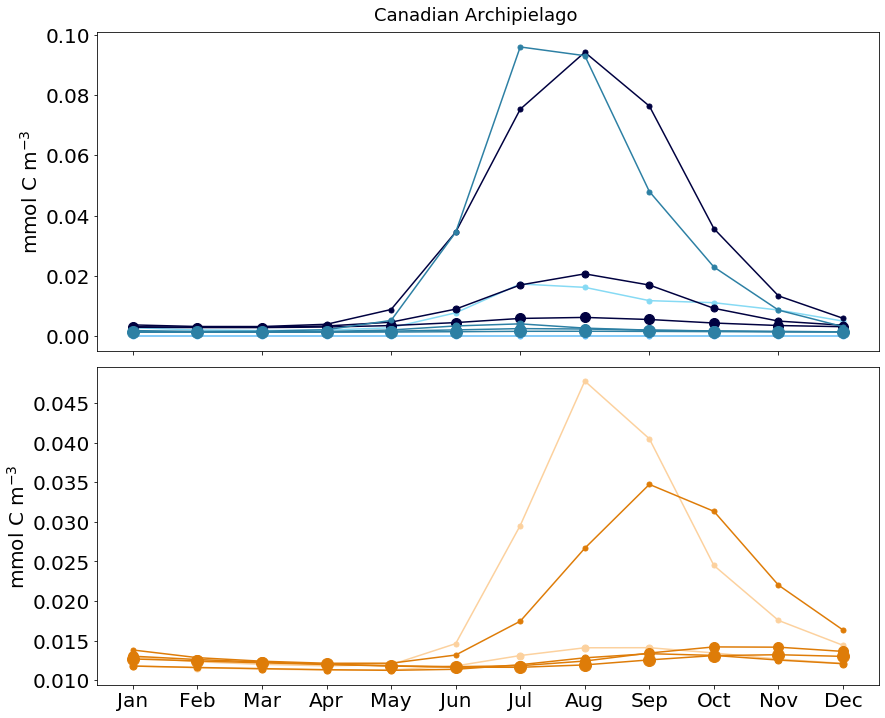

In [40]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Canadian Archipielago',y=0.91,fontsize=18)

axs[0].plot(ppc_ca, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_ca, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_ca, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_ca, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_ca, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_ca, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_ca, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_ca, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_ca, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=20)
axs[0].tick_params(axis='y', labelsize= 20)

axs[1].plot(zoo1c_ca, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_ca, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_ca, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_ca, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_ca, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_ca, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=20)

plt.ylabel('$mmol$ C $m^{-3}$', fontsize=20)
plt.yticks(fontsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Canadian_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')

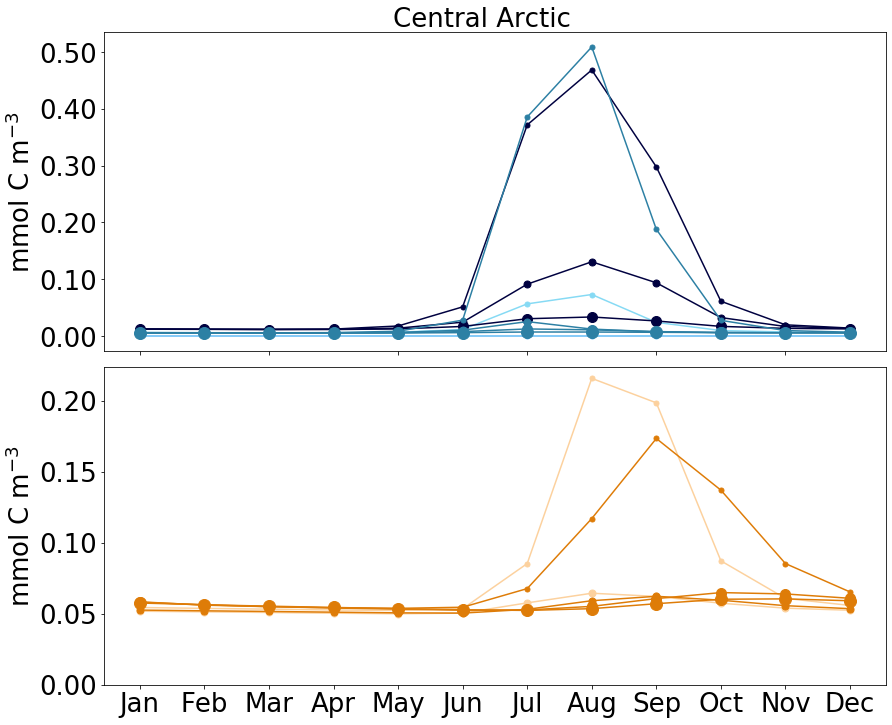

In [62]:
fig, axs = plt.subplots(2,figsize=(14,12))
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.suptitle('Central Arctic',y=0.91,fontsize=26)

axs[0].plot(ppc_ao, '-o', color='#86daf4',markersize=5,label='picoplankton')
axs[0].plot(d1c_ao, '-o', color='#000140',markersize=5,label='diatom 1')
axs[0].plot(d2c_ao, '-o', color='#000140',markersize=7,label='diatom 2 ')
axs[0].plot(d3c_ao, '-o',  color='#000140',markersize=10,label='diatom 3 ')
axs[0].plot(diazc_ao, '-o', color='#60baf7',markersize=5,label='diazotroph ')
axs[0].plot(mp1c_ao, '-o', color='#2d80a4',markersize=5,label='mixed phytoplankton 1 ')
axs[0].plot(mp2c_ao, '-o', color='#2d80a4',markersize=7,label='mixed phytoplankton 2 ')
axs[0].plot(mp3c_ao, '-o', color='#2d80a4',markersize=10,label='mixed phytoplankton 3 ')
axs[0].plot(mp4c_ao, '-o', color='#2d80a4',markersize=12,label='mixed phytoplankton 4 ')
#axs[0].legend(loc='upper right')
axs[0].set_ylabel('$mmol$ C $m^{-3}$', fontsize=26)
axs[0].tick_params(axis='y', labelsize= 26)

axs[1].plot(zoo1c_ao, '-o',color='#FCD19E',markersize=5,label='micozooplankton 1')
axs[1].plot(zoo2c_ao, '-o',color='#FCD19E',markersize=7,label='micozooplankton 2')
axs[1].plot(zoo3c_ao, '-o',color='#DE7C08',markersize=5,label='mesozooplankton 1 ')
axs[1].plot(zoo4c_ao, '-o',color='#DE7C08',markersize=7,label='mesozooplankton 2 ')
axs[1].plot(zoo5c_ao, '-o',color='#DE7C08',markersize=10,label='mesozooplankton 3 ')
axs[1].plot(zoo6c_ao, '-o',color='#DE7C08',markersize=12,label='mesozooplankton 4 ')
#axs[1].legend(loc='upper right')

plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May',
                             'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=26)

plt.ylabel('$mmol$ C $m^{-3}$', fontsize=26)
plt.yticks([0.00,0.05,0.10,0.15,0.20],fontsize=26)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Central_clim_allzoo&phyto'+new_file+'_'+new_year+'_year.png',dpi=300, bbox_inches='tight')